## **Trying Out**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv(
    'fcc-forum-pageviews.csv',
    dtype={'value': 'int'},
    parse_dates=[0],
    index_col=[0]
)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [21]:
# data cleaning
df = df.loc[
    (df['value'] <= df['value'].quantile(0.975)) &
    (df['value'] >= df['value'].quantile(0.025))
]
df.size

1238

Text(0.5, 0, 'Date')

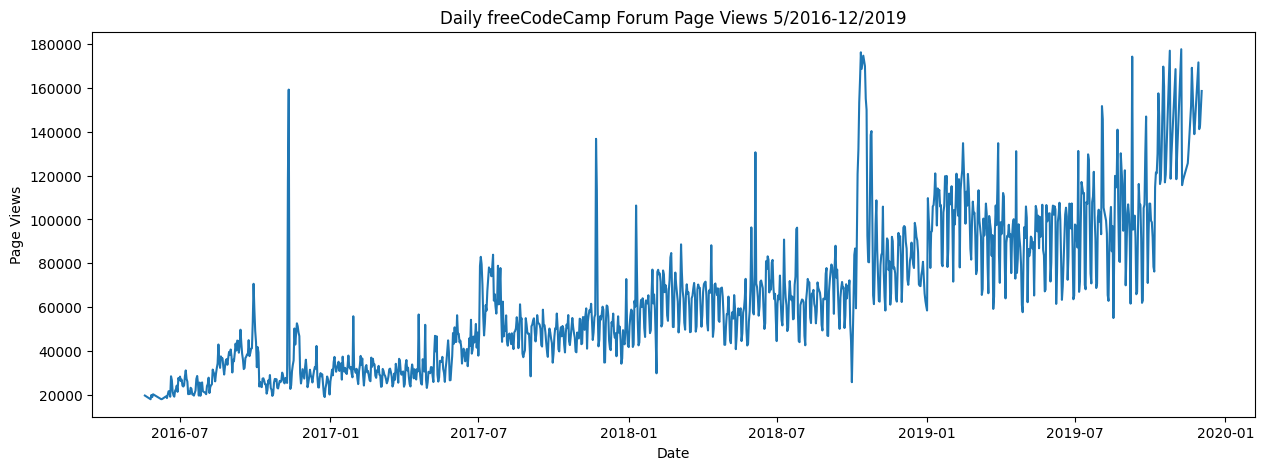

In [22]:
# Line Graph
df_line = df.copy()
fig1, ax1 = plt.subplots(figsize=(15, 5))
ax1.plot(df_line.index, df_line['value'])
ax1.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax1.set_ylabel('Page Views')
ax1.set_xlabel('Date')

In [23]:
# Bar Graph
df_bar = df.copy()
# create new columns
df_bar['Year'] = df_bar.index.year
df_bar['Month'] = df_bar.index.month
bar_graph = df_bar.groupby(['Year', 'Month'])['value'].mean().unstack()
bar_graph

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


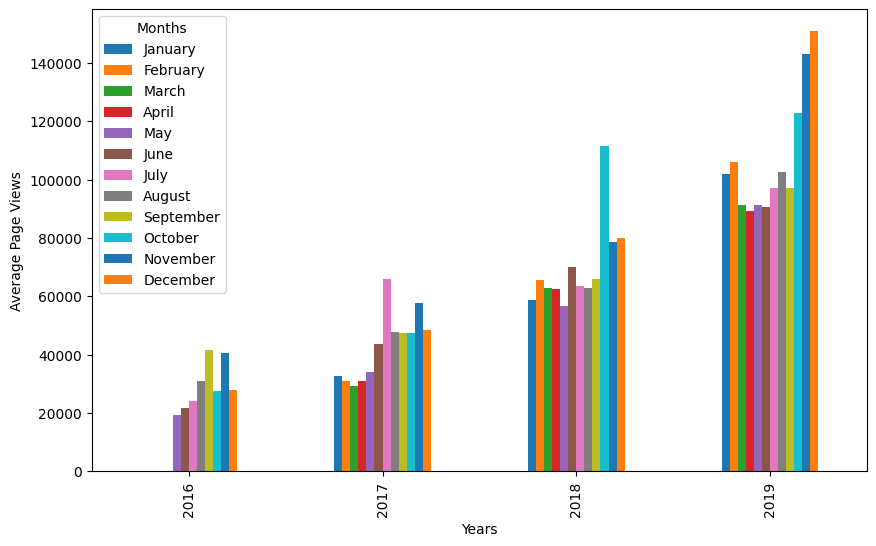

In [24]:
fig2, ax2 = plt.subplots(figsize=(10, 6))
bar_graph.plot(kind='bar', ax=ax2)
ax2.set_ylabel('Average Page Views')
ax2.set_xlabel('Years')
ax2.legend(
    title='Months',
    labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

In [29]:
# box plots
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


Text(0, 0.5, 'Page Views')

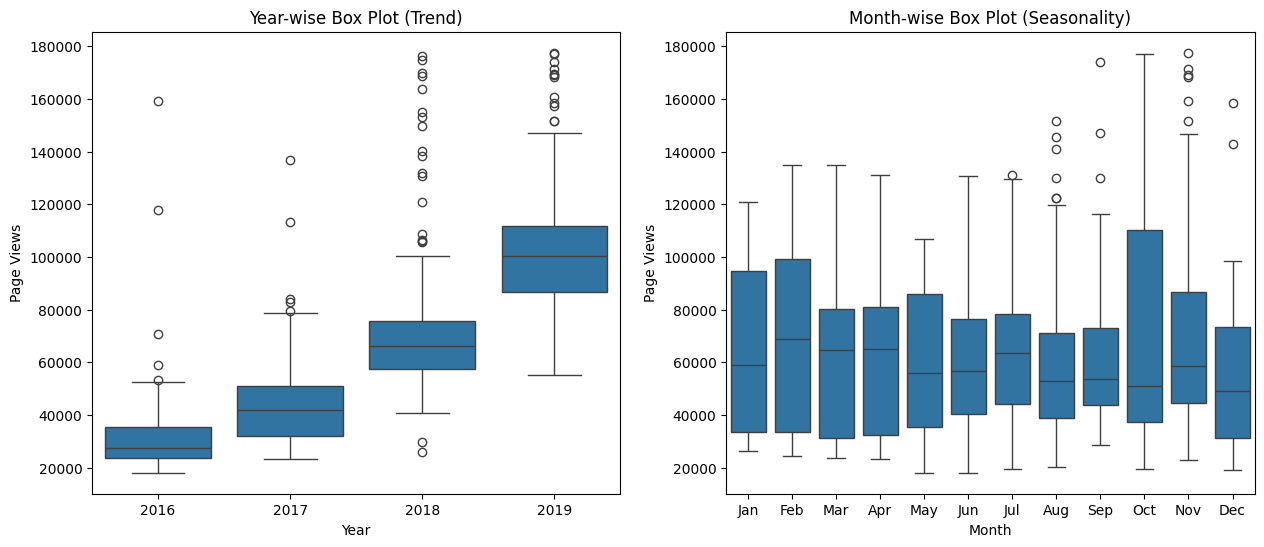

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
# first plot
sns.boxplot(
    data=df_box,
    x='year',
    y='value',
    ax=ax[0]
)
ax[0].set_title('Year-wise Box Plot (Trend)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Page Views')

# second plot
order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.boxplot(
    data=df_box,
    x='month',
    y='value',
    ax=ax[1],
    order=order
)
ax[1].set_title('Month-wise Box Plot (Seasonality)')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Page Views')